In [1]:
####import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns

In [2]:
####After this process, the 'k'th subject's data will be pasted on study(or test)_list['k'] 

study_list = [None]
test_list = [None]

for l in range(31):
    if l <= 8:
        study_list.append(pd.read_csv('./DMdata/DM0{}/DM0{}_study.txt'.format(l+1,l+1), sep = "\t", engine='python', encoding = "cp949", index_col = False))
    else :
        study_list.append(pd.read_csv('./DMdata/DM{}/DM{}_study.txt'.format(l+1,l+1), sep = "\t", engine='python', encoding = "cp949", index_col = False))

for k in range(31):
    if k <= 8:
        test_list.append(pd.read_csv('./DMdata/DM0{}/DM0{}_test.txt'.format(k+1,k+1), sep = "\t", engine='python', encoding = "cp949", index_col = False))
    else :
        test_list.append(pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(k+1,k+1), sep = "\t", engine='python', encoding = "cp949", index_col = False))

####display the 2nd subject's study data
display(study_list[2])
####print the 17th subject's test data
print(test_list[17])

,Trial,ObjID,LocID,FB,Task,RT,Stim
0,1,44,3,1,-2,1500,4015
1,2,126,1,1,-2,1500,10027
2,3,185,2,1,-2,1283,16025
3,4,86,4,1,-2,632,24023
4,5,137,2,1,-2,965,32021
...,...,...,...,...,...,...,...
259,260,199,4,1,-1,616,695931
260,261,250,3,1,-1,1015,701930
261,262,4,2,1,-1,615,709928
262,263,128,4,1,-1,750,715925


     Trial  Object_ID  Task_Type  Stim_onset1   RT1  Res1  Stim_onset2   RT2  \
0        1        213          0         1006  2224     1         4966   565   
1        2        236          1         6664   761     4            0     0   
2        3         35          0        10176   329     1        12240   365   
3        4        217          0        13621   828     1        16185  1630   
4        5        128          0        18948   795     1        21478   514   
..     ...        ...        ...          ...   ...   ...          ...   ...   
523    524        146          0      1780321   245     1      1782302   182   
524    525        189          1      1783617   395     4            0     0   
525    526         10          1      1786763   612     4            0     0   
526    527        160          1      1790125   528     4            0     0   
527    528        170          1      1793404   312     4            0     0   

     Res2  
0       4  
1       0  
2  

In [3]:
####Add a column whose name is "Res_Type"
conditions = []

values = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
for h in range(31):
    conditions.append([(test_list[h+1]['Task_Type']==a) & (test_list[h+1]['Res1']==b) for a in range(2) for b in range(1,5)])

    
for i in range(31):
    test_list[i+1]["Res_Type"]= np.select(conditions[i], values)

In [4]:
####check whether it properly worked by comparing 264rows vs 264rows

X = test_list[2][test_list[2]['Task_Type']==0]
print(X)
Y = test_list[2][test_list[2]['Res_Type'].isin(values[:4])]

len(X) == len(Y)

     Trial  Object_ID  Task_Type  Stim_onset1   RT1  Res1  Stim_onset2   RT2  \
0        1         56          0         1005  3114     1         5855  1532   
1        2         70          0         8520  1631     1        11888  1865   
5        6         84          0        27470   981     4        30188  1066   
8        9         22          0        41487   681     3        43905   749   
9       10         99          0        45670  1765     2        49172  1415   
..     ...        ...        ...          ...   ...   ...          ...   ...   
516    517         81          0      2098384   764     2      2100885   782   
517    518        153          0      2102800   397     1      2104935   665   
522    523         35          0      2120634   864     1      2123235   749   
524    525         82          0      2128634   463     2      2130835   682   
526    527        131          0      2135951   364     1      2138052   882   

     Res2 Res_Type  
0       2   HIT-HC

True

In [14]:
''''HitnMiss = values[:4]
CRnFA = values[4:]
MScores = [None]

old = test_list[1][test_list[1]['Res_Type'].isin(HitnMiss)]['Res_Type'].value_counts(normalize=True)
new = test_list[1][test_list[1]['Res_Type'].isin(CRnFA)]['Res_Type'].value_counts(normalize=True)
df = pd.concat([old,new], axis = 0)
X = pd.Series(df, name="Memory Scores").to_frame()
X.reset_index()
X.columns = ['Res Type', 'Memory Scores']''''

Index(['Memory Scores'], dtype='object')

In [51]:
####Memory Score data of each subject
####After this process, every subject's memory score data will be pasted on MScores. 

HitnMiss = values[:4]
CRnFA = values[4:]
MScores = [None]

for k in range(1,32):
    old = test_list[k][test_list[k]['Res_Type'].isin(HitnMiss)]['Res_Type'].value_counts(normalize=True)
    new = test_list[k][test_list[k]['Res_Type'].isin(CRnFA)]['Res_Type'].value_counts(normalize=True)
    df = pd.concat([old,new], axis = 0)
    X = pd.Series(df, name="Memory Scores").to_frame()
    X.index.name = 'Res Type'
    Y = X.reindex(index=values)
    Z = Y.reset_index()
    Z["Task Type"] = Z["Res Type"].isin(HitnMiss)
    Z['Task Type'] = Z['Task Type'].replace([True, False],['Old','New'])
    MScores.append(Z)

####Just check
print(MScores[1])
    

  Res Type  Memory Scores Task Type
0   HIT-HC       0.670455       Old
1   HIT-LC       0.140152       Old
2  MISS-LC       0.106061       Old
3  MISS-HC       0.083333       Old
4    FA-HC       0.030303       New
5    FA-LC       0.094697       New
6    CR-LC       0.344697       New
7    CR-HC       0.530303       New


Define some functions

,Res Type,Memory Scores,Task Type
0,HIT-HC,0.299242,Old
1,HIT-LC,0.280303,Old
2,MISS-LC,0.181818,Old
3,MISS-HC,0.238636,Old
4,FA-HC,0.034091,New
5,FA-LC,0.155303,New
6,CR-LC,0.321970,New
7,CR-HC,0.488636,New


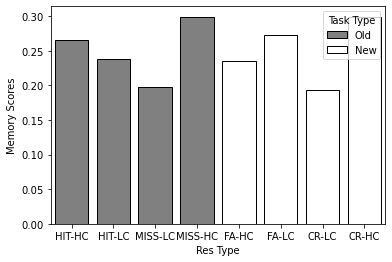

In [18]:
####A function shows you his memory score table when you input the subject's id

def subject_MScore(id):
    return MScores[id]


####A function shows you his memory score table when you input the subject's id

def subject_MScore_bar(id):
    palette ={"Old": "gray", "New": "white"}
    ax = sns.barplot(x="Res Type", y="Memory Scores", hue="Task Type", data=MScores[id], palette = palette, dodge=False, edgecolor='k')    
    
    
    
display(subject_MScore(7))    

subject_MScore_bar(21)
    

Memory Scores

-plotting the mean and std of entire subject data

In [19]:
####All the data of every subject including 'Task Type' column will be pasted on 'Bulk'

tmp = [subject_MScore(i) for i in range(1,32)]
Bulk = pd.concat(tmp)
Bulk["Task Type"] = Bulk["Res Type"].isin(HitnMiss)
Bulk['Task Type'] = Bulk['Task Type'].replace([True],'Old')
Bulk['Task Type'] = Bulk['Task Type'].replace([False],'New')
display(Bulk)

,Res Type,Memory Scores,Task Type
0,HIT-HC,0.670455,Old
1,HIT-LC,0.140152,Old
2,MISS-LC,0.106061,Old
3,MISS-HC,0.083333,Old
4,FA-HC,0.030303,New
...,...,...,...
3,MISS-HC,0.318182,Old
4,FA-HC,0.087121,New
5,FA-LC,0.079545,New
6,CR-LC,0.337121,New


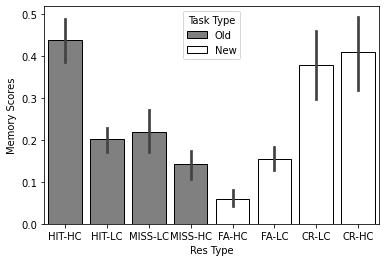

In [20]:
####Plot with error bar & differentiate the color by 'Task Type'

palette ={"Old": "gray", "New": "white"}
ax = sns.barplot(x="Res Type", y="Memory Scores", hue="Task Type", data=Bulk, palette = palette, dodge=False, edgecolor='k')


In [10]:
#### source memory correct rate

In [28]:
old_test = [None]

for k in range(1,32):
    old_test.append(test_list[k][test_list[k]['Task_Type']==0])


In [29]:
old_test[31]

,Trial,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2,Res_Type
2,3,95,0,14810,4175,1,20721,3911,4,HIT-HC
3,4,151,0,25765,1710,1,29211,7291,1,HIT-HC
4,5,145,0,37635,1094,1,40465,565,1,HIT-HC
6,7,138,0,45992,813,1,48540,2296,3,HIT-HC
7,8,146,0,51969,6838,4,60543,3977,5,MISS-HC
...,...,...,...,...,...,...,...,...,...,...
520,521,67,0,2464975,612,2,2467322,981,1,HIT-LC
522,523,12,0,2472516,395,1,2474647,1081,3,HIT-HC
523,524,54,0,2476861,662,4,2479259,448,5,MISS-HC
524,525,253,0,2480724,746,1,2483204,565,2,HIT-HC


numpy.int64

In [47]:
for id in range(1,32):
    if id == 24 :
        None
    
    else:
        old_test[id]['SRC'] = ['correct' if int(old_test[id][old_test[id]['Object_ID'].isin([objid])].iloc[0][8]) == int(study_list[id][study_list[id]['ObjID'].isin([objid])].iloc[0][2]) else 'incorrect' for objid in old_test[id]['Object_ID']]

<ipython-input-47-c293bba124fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_test[id]['SRC'] = ['correct' if int(old_test[id][old_test[id]['Object_ID'].isin([objid])].iloc[0][8]) == int(study_list[id][study_list[id]['ObjID'].isin([objid])].iloc[0][2]) else 'incorrect' for objid in old_test[id]['Object_ID']]


In [30]:
#### 원본
for id in range(1,32):
    old_test[id]['SRC'] = ['correct' if int(old_test[id][old_test[id]['Object_ID'].isin([objid])].iloc[0][8]) == int(study_list[id][study_list[id]['ObjID'].isin([objid])].iloc[0][2]) else 'incorrect' for objid in old_test[id]['Object_ID']]

<ipython-input-30-6d5cd2ddc0fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_test[id]['SRC'] = ['correct' if int(old_test[id][old_test[id]['Object_ID'].isin([objid])].iloc[0][8]) == int(study_list[id][study_list[id]['ObjID'].isin([objid])].iloc[0][2]) else 'incorrect' for objid in old_test[id]['Object_ID']]


IndexError: single positional indexer is out-of-bounds

In [ ]:
X = pd.Series(df, name="Memory Scores").to_frame()
X.index.name = 'Res Type'
Y = X.reindex(index=values)
Z = Y.reset_index()
Z["Task Type"] = Z["Res Type"].isin(HitnMiss)
Z['Task Type'] = Z['Task Type'].replace([True, False],['Old','New'])

In [94]:
temp = []

for id in range(1,32):
    if id == 24 :
        None
    
    else:
        idx = old_test[id][old_test[id]['SRC']=='incorrect'].index
        old_test[id] = old_test[id].drop(idx)
        df = old_test[id]['Res_Type'].value_counts(normalize=True)
        X = pd.Series(df, name="Memory Scores").to_frame()
        X.index.name = 'Res Type'
        Z = X.reset_index()
        temp.append(Z)
        
print(temp)

Bulk2 = pd.concat(temp)

[  Res Type  Memory Scores
0   HIT-HC       0.928571
1   HIT-LC       0.051948
2  MISS-LC       0.019481,   Res Type  Memory Scores
0   HIT-HC           0.68
1   HIT-LC           0.32,   Res Type  Memory Scores
0   HIT-HC       0.870130
1   HIT-LC       0.103896
2  MISS-LC       0.025974,   Res Type  Memory Scores
0   HIT-HC       0.775194
1  MISS-HC       0.193798
2  MISS-LC       0.023256
3   HIT-LC       0.007752,   Res Type  Memory Scores
0   HIT-HC            1.0,   Res Type  Memory Scores
0   HIT-HC       0.659091
1   HIT-LC       0.193182
2  MISS-HC       0.102273
3  MISS-LC       0.045455,   Res Type  Memory Scores
0   HIT-HC       0.583333
1   HIT-LC       0.250000
2  MISS-LC       0.100000
3  MISS-HC       0.066667,   Res Type  Memory Scores
0   HIT-HC       0.945455
1   HIT-LC       0.036364
2  MISS-LC       0.018182,   Res Type  Memory Scores
0   HIT-HC       0.708333
1   HIT-LC       0.291667,   Res Type  Memory Scores
0   HIT-HC          0.975
1   HIT-LC          0.025,  

In [ ]:
tmp = [subject_MScore(i) for i in range(1,32)]
Bulk = pd.concat(tmp)
Bulk["Task Type"] = Bulk["Res Type"].isin(HitnMiss)
Bulk['Task Type'] = Bulk['Task Type'].replace([True],'Old')
Bulk['Task Type'] = Bulk['Task Type'].replace([False],'New')
display(Bulk)

In [ ]:
# for subject 1
idx = old_test[1][old_test[1]['SRC']=='incorrect'].index
old_test[1] = old_test[1].drop(idx)
df = old_test[1]['Res_Type'].value_counts(normalize=True)
X = pd.Series(df, name="Memory Scores").to_frame()
X.index.name = 'Res Type'
Y = X.reindex(index=['Hit-HC&SRC','Hit-LC&SRC','MISS-LC&SRC','MISS-HC&SRC'])
Z = Y.reset_index()

In [88]:
idx = old_test[1][old_test[1]['SRC']=='incorrect'].index
old_test[1] = old_test[1].drop(idx)
df = old_test[1]['Res_Type'].value_counts(normalize=True)
X = pd.Series(df, name="Memory Scores").to_frame()
X.index.name = 'Res Type'
Z = X.reset_index()
print(X)
print(Z)

          Memory Scores
Res Type               
HIT-HC         0.928571
HIT-LC         0.051948
MISS-LC        0.019481
  Res Type  Memory Scores
0   HIT-HC       0.928571
1   HIT-LC       0.051948
2  MISS-LC       0.019481


In [90]:
display(Bulk2)

,Res Type,Memory Scores
0,HIT-HC,0.928571
1,HIT-LC,0.051948
2,MISS-LC,0.019481
0,HIT-HC,0.928571
1,HIT-LC,0.051948
...,...,...
1,HIT-LC,0.051948
2,MISS-LC,0.019481
0,HIT-HC,0.928571
1,HIT-LC,0.051948


In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))
bar = sns.barplot(x="Res Type", y="Memory Scores", data=Bulk2, color = 'gray', dodge=False, edgecolor='k', ax = ax1)
plt.axhline(y=0.25, ls='--', c='k')